# Basic settings

In [1]:
(ext:chdir "~/Development/clasp/extensions/cando/src/tests/boron/" t)

0

#### Create all paths.

In [2]:
(leap.core::clear-path)
(add-path "~/Development/clasp/extensions/cando/src/tests/boron/")
(add-path "~/Development/amber16/dat/leap/cmd/")
(add-path "~/Development/amber16/dat/leap/lib/")
(add-path "~/Development/amber16/dat/leap/parm/")
(add-path "~/Development/amber16/dat/leap/prep/")
(add-path "~/Development/amber16/dat/antechamber/")

(#P"/Users/tuj24515/Development/amber16/dat/antechamber/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/prep/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/parm/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/lib/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/cmd/"
 #P"/Users/tuj24515/Development/clasp/extensions/cando/src/tests/boron/")

In [3]:
(start-swank)

swank-loader -> /Users/tuj24515/Development/slime/swank-loader.lisp

"Read: (DEFPACKAGE :SWANK-LOADER (:USE :CL) (:EXPORT :INIT :DUMP-IMAGE :LIST-FASLS :*SOURCE-DIRECTORY* :*FASL-DIRECTORY*))
" 
"Read: (IN-PACKAGE :SWANK-LOADER)
" 
"Read: (DEFVAR *SOURCE-DIRECTORY* (MAKE-PATHNAME :NAME NIL :TYPE NIL :DEFAULTS (OR *LOAD-PATHNAME* *DEFAULT-PATHNAME-DEFAULTS*)) The directory where to look for the source.)
" 
"Read: (DEFPARAMETER *SYSDEP-FILES* (QUOTE ((SWANK CLASP) (SWANK GRAY))))
" 
"Read: (DEFPARAMETER *IMPLEMENTATION-FEATURES* (QUOTE (:ALLEGRO :LISPWORKS :SBCL :CLOZURE :CMU :CLISP :CCL :CORMAN :CORMANLISP :ARMEDBEAR :GCL :ECL :SCL :MKCL :CLASP)))
" 
"Read: (DEFPARAMETER *OS-FEATURES* (QUOTE (:MACOSX :LINUX :WINDOWS :MSWINDOWS :WIN32 :SOLARIS :DARWIN :SUNOS :HPUX :UNIX)))
" 
"Read: (DEFPARAMETER *ARCHITECTURE-FEATURES* (QUOTE (:POWERPC :PPC :X86 :X86-64 :X86_64 :AMD64 :I686 :I586 :I486 :PC386 :IAPX386 :SPARC64 :SPARC :HPPA64 :HPPA :ARM :ARMV5L :ARMV6L :ARMV7L :ARM64 :PENTIUM3 :PENTIUM4 

T

#### Load the GAFF force field and boronic ester frcmod file.

In [4]:
(clear-force-field)
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

(#<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [5]:
(load-amber-params "gaff.dat")

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD gaff.dat>

In [6]:
(load-atom-type-rules "boron.def")
(load-atom-type-rules "water_gaff.def")

(#<FORCE-FIELD water_gaff.def> #<FORCE-FIELD boron.def> #<FORCE-FIELD gaff.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [7]:
(load-amber-params "frcmod.boronic-ester")
(gethash :default leap.core::*force-fields*)

(#<FORCE-FIELD frcmod.boronic-ester> #<FORCE-FIELD water_gaff.def>
 #<FORCE-FIELD boron.def> #<FORCE-FIELD gaff.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

#### Merge force field and define parameter ff.

In [8]:
(:= *ff* (leap.core::merged-force-field))

SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb


*FF*

## Prototypical aryl boronic ester

#### Display a prototypical aryl boronic ester.

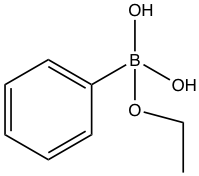

In [9]:
 (cl-jupyter-user:png-from-file "arylboronate2d.png")

#### Load the arylboronic ester from a Chemdraw file.

In [10]:
(defparameter *chemagg* (cando:load-chem-draw-aggregate "arylboronate.cdxml"))

*CHEMAGG*

In [11]:
(build-hydrogens *chemagg*)

NIL

#### Draw the 2D representation of the molecule loaded from the Chemdraw file.

In [12]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

#### Automatically assign atom types.

In [13]:
(chem:assign-types *ff* *chemagg*)

NIL

In [14]:
(jostle *chemagg*)

NIL

#### Atomatically assign force-field parameters and minimize the energy of the molecule.

In [15]:
(energy:minimize *chemagg* :force-field *ff* :restraints-on nil)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          14867.435
 minSDnP       0     2  0.000365   0.0        2613014.707           7570.200
 minSDnP       0     3  0.000304   0.0        2017717.439           5321.457
DONE absolute force test:
forceRmsMag(4509.238769).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     4  0.000000   0.0              0.000           4509.239
 minCGnP       0     5  0.000333  39.8        1441599.918           3756.746
 minCGnP       0     6  0.001485  42.2         717315.089           2574.030
 minCGnP       0     7  0.000676  53.1         561157.107           2461.959
 minCGnP       0     8  0.000487  41.6         460529.525           1694.841
 minCGnP       0     9  0.000685  53.0         392931.885           1734.227
 minCGnP       0    10  0.000960  60.7         301206.275 

#<ENERGY-FUNCTION >

#### Visualize the minimized structure and demonstrate that the force field parameters lead to the construction of a chemically 

#### reasonable structure.

In [16]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

#### Set the bounding box.

In [17]:
(chem:set-property *chemagg* :bounding-box '(30.0 30.0 30.0))

NIL

#### Assign atom types again.

In [18]:
(chem:assign-types *ff* *chemagg*)

NIL

#### Save the topology file and coordinate file.

In [19]:
(leap.topology:save-amber-parm-format *chemagg* "boronic-ester.top" "boronic-ester.crd" *ff* :assign-types nil)

atom1: #<ATOM :B/:B> atom2: #<ATOM :C_118/:C> i1: 0 i2: 3
 atom1: #<ATOM :C_118/:C> atom2: #<ATOM :C_116/:C> i1: 3 i2: 15
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 6 i2: 0
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 9 i2: 0
 atom1: #<ATOM :O/:O> atom2: #<ATOM :B/:B> i1: 12 i2: 0
 atom1: #<ATOM :C_116/:C> atom2: #<ATOM :C_114/:C> i1: 15 i2: 24
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :C_118/:C> i1: 18 i2: 3
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :C_110/:C> i1: 18 i2: 27
 atom1: #<ATOM :C_142/:C> atom2: #<ATOM :O/:O> i1: 21 i2: 12
 atom1: #<ATOM :C_114/:C> atom2: #<ATOM :C_112/:C> i1: 24 i2: 33
 atom1: #<ATOM :C_144/:C> atom2: #<ATOM :C_142/:C> i1: 30 i2: 21
 atom1: #<ATOM :C_112/:C> atom2: #<ATOM :C_110/:C> i1: 33 i2: 27
 atom1: #<ATOM :H_112/:H> atom2: #<ATOM :C_112/:C> i1: 36 i2: 33
 atom1: #<ATOM :H_1441/:H> atom2: #<ATOM :C_144/:C> i1: 39 i2: 30
 atom1: #<ATOM :H_1442/:H> atom2: #<ATOM :C_144/:C> i1: 42 i2: 30
 atom1: #<ATOM :H_1443/:H> atom2: #<ATOM :C_144/:C> i1: 45 i2: 

0

## Boronic ester 01

#### Load the arylboronic ester from a Chemdraw file.

In [20]:
(defparameter *b01agg* (cando:load-chem-draw-aggregate "boronic-ester01.cdxml"))

*B01AGG*

In [21]:
(progn
  (defparameter *stereocenters*
    (sort (cando:gather-stereocenters *b01agg*) #'string< :key #'chem:get-name))
  (cando:set-stereoisomer-func *stereocenters* (constantly :S) :show t)
  (let ((quat-matcher (core:make-cxx-object 'chem:chem-info)))
    (chem:compile-smarts quat-matcher "[C&H0&D4]")
    (chem:map-atoms nil (lambda (a) (when (chem:matches quat-matcher a)
                  (chem:set-configuration a :S)
                  (format t "Set atom ~a to :S~%" (chem:get-name a))))
            *b01agg*)))

C_108  S
C_110  S
C_133  S
C_135  S
C_1968 S
C_1969 S
C_1970 S
C_1981 S
C_1982 S
C_2003 S
C_2004 S
C_2005 S
C_2016 S
C_2017 S
C_208  S
C_210  S
C_233  S
C_235  S
C_722  S
C_723  S
C_724  S
C_725  S
C_726  S
Set atom C_210 to :S
Set atom C_235 to :S
Set atom C_135 to :S
Set atom C_110 to :S


NIL

#### Minimize the energy of the molecule.

In [22]:
(chem:assign-types *ff* *b01agg*)

NIL

In [23]:
(jostle *b01agg*)

NIL

In [24]:
(defparameter *b01e* (energy:minimize *b01agg* :force-field *ff* :restraints-on t))

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000         178275.510
 minSDnP       0     2  0.000445   0.0     1586823266.172          91127.777
 minSDnP       0     3  0.000352   0.0      652464417.455          48240.450
 minSDnP       0     4  0.000399   0.0      353570242.366          34588.990
 minSDnP       0     5  0.000338   0.0      225520853.163          23521.753
 minSDnP       0     6  0.000387   0.0      156266525.423          19733.138
 minSDnP       0     7  0.000338   0.0      114917955.648          15058.908
 minSDnP       0     8  0.000394   0.0       86019770.412          13453.626
 minSDnP       0     9  0.000349   0.0       66209363.561          10680.495
 minSDnP       0    10  0.000402   0.0       51292103.323           9766.252
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0    11  0.000353

*B01E*

In [25]:
(nglv::show-aggregate *b01agg*)

A Jupyter Widget

#### Save the topology file and coordinate file.

In [26]:
(chem:set-property *b01agg* :bounding-box '(30.0 30.0 30.0))

NIL

In [27]:
(chem:assign-types *ff* *b01agg*)

NIL

In [28]:
(leap.topology:save-amber-parm-format *b01agg* "b01.top" "b01.crd" *ff* :assign-types nil)

atom1: #<ATOM :O/:O> atom2: #<ATOM :B/:B> i1: 0 i2: 6
 atom1: #<ATOM :C_2017/:C> atom2: #<ATOM :O/:O> i1: 3 i2: 0
 atom1: #<ATOM :C_2017/:C> atom2: #<ATOM :H/:H> i1: 3 i2: 12
 atom1: #<ATOM :C_2017/:C> atom2: #<ATOM :C_2016/:C> i1: 3 i2: 15
 atom1: #<ATOM :B/:B> atom2: #<ATOM :C_342/:C> i1: 6 i2: 18
 atom1: #<ATOM :B/:B> atom2: #<ATOM :OH/:O> i1: 6 i2: 21
 atom1: #<ATOM :B/:B> atom2: #<ATOM :OH/:O> i1: 6 i2: 24
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :C_2017/:C> i1: 9 i2: 3
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :C_2005/:C> i1: 9 i2: 27
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :H/:H> i1: 9 i2: 30
 atom1: #<ATOM :C_2016/:C> atom2: #<ATOM :C_2003/:C> i1: 15 i2: 36
 atom1: #<ATOM :C_2016/:C> atom2: #<ATOM :H/:H> i1: 15 i2: 39
 atom1: #<ATOM :C_2016/:C> atom2: #<ATOM :OH/:O> i1: 15 i2: 42
 atom1: #<ATOM :C_342/:C> atom2: #<ATOM :C_340/:C> i1: 18 i2: 45
 atom1: #<ATOM :C_2005/:C> atom2: #<ATOM :H/:H> i1: 27 i2: 54
 atom1: #<ATOM :C_2005/:C> atom2: #<ATOM :C_2014/:C> i1: 27 i2: 57
 atom1:

0

#### Calculate each energy parameters.

In [29]:
(chem:get-energy (chem:get-stretch-component *b01e*))

78.36244127574096d0

In [30]:
(chem:get-energy (chem:get-angle-component *b01e*))

82.03313635095026d0

In [31]:
(chem:get-energy (chem:get-dihedral-component *b01e*))

169.60105283984052d0

In [32]:
(chem:get-energy (chem:get-nonbond-component *b01e*))

223.82138137994644d0

#### Create Tip3 water molecules box.

In [33]:
(load-off "tip3pfbox.off")

(:TIP3PFBOX)

In [34]:
(nglv::show-aggregate ~tip3pfbox)

A Jupyter Widget

In [35]:
(print ~tip3pfbox)


AGGREGATE 

AGGREGATE

In [36]:
(defparameter *solvent* ~tip3pfbox)

*SOLVENT*

In [37]:
(chem:assign-types *ff* *solvent*)

NIL

#### Add Tip3 water molecules to the boronic ester.

In [38]:
(:= *b01wagg* (leap.solvate::tool-solvate-and-shell *b01agg* *solvent* '(30.0 30.0 30.0) :shell t :farness 7.0))

Total bounding box for atom centers:  78.44758151993562d0 83.98272322868118d0 69.24155598662088d0


*B01WAGG*

In [39]:
(chem:map-atoms 'list (lambda (a) (chem:get-type a)) *b01wagg*)

(:|os| :|c3| :|b| :|c3| :|h1| :|c3| :|c2| :|oh| :|oh| :|c3| :|h1| :|os| :|c3|
 :|h1| :|oh| :|c2| :|c2| :|os| :|h1| :|c3| :|c3| :|h2| :|os| :|c2| :|c2| :|oh|
 :|os| :|c3| :|h2| :|b| :|c2| :|c3| :|h1| :|oh| :|c3| :|c2| :|oh| :|oh| :|c3|
 :|c3| :|h1| :|c3| :|os| :|h1| :|c2| :|c2| :|n| :|h1| :|os| :|oh| :|b| :|c2|
 :|c2| :|c3| :|c| :|c3| :|c2| :|oh| :|oh| :|c2| :|c3| :|c3| :|c| :|c3| :|o|
 :|os| :|c3| :|h2| :|c2| :|c2| :|c3| :|c3| :|n| :|o| :|n| :|c3| :|c3| :|h1|
 :|oh| :|c3| :|c2| :|c2| :|n| :|c| :|c| :|c3| :|c3| :|c3| :|h1| :|c3| :|os|
 :|h1| :|c2| :|c| :|n| :|o| :|c3| :|o| :|c| :|h1| :|oh| :|oh| :|b| :|c3| :|n|
 :|o| :|c3| :|c3| :|o| :|c2| :|oh| :|oh| :|c3| :|c3| :|n| :|c2| :|c2| :|c2|
 :|c| :|c| :|c2| :|c2| :|c2| :|c2| :|n| :|o| :|c3| :|o| :|c2| :|c2| :|c2| :|c3|
 :|c3| :|c3| :|c2| :|c3| :|n3| :|c| :|o| :|oh| :|h1| :|ha| :|h1| :|h1| :|hc|
 :|hc| :|h1| :|h1| :|ha| :|ha| :|ha| :|ha| :|ha| :|ha| :|ha| :|ha| :|h1| :|h1|
 :|h1| :|h1| :|h1| :|hc| :|hc| :|h1| :|h1| :|h1| :|h1| :|h1| :|h1| :|h

#### Minimize the energy of the water and boronic ester.

In [40]:
(defparameter *b01we* (energy:minimize *b01wagg* :force-field *ff* :restraints-on t))

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(5.405027).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000              5.405
 minCGnP       0     2  0.000655  30.2            296.044              3.149
 minCGnP       0     3  0.000931  46.9            279.677              2.905
 minCGnP       0     4  0.000789  42.3            267.873              1.792
 minCGnP       0     5  0.000790  44.0            263.375              1.275
 minCGnP       0     6  0.001027  55.0            260.415              1.306
 minCGnP       0     7  0.000953  61.0            257.530              1.352
 minCGnP       0     8  0.001327  64.9            253.228              1.403
 minCGnP       0     9  0.000917  62.0            250.028              1.113
 minCGnP       0    10  0.000813  63.0            248.239    

*B01WE*

In [41]:
(nglv::show-aggregate *b01wagg*)

A Jupyter Widget

#### Save the topology file and coordinate file.

In [42]:
(chem:assign-types *ff* *b01wagg*)

NIL

In [43]:
(leap.topology:save-amber-parm-format *b01wagg* "b01_water.top" "b01_water.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_2017/:C> atom2: #<ATOM :O/:O> i1: 3 i2: 0
 atom1: #<ATOM :C_2017/:C> atom2: #<ATOM :H/:H> i1: 3 i2: 12
 atom1: #<ATOM :C_2017/:C> atom2: #<ATOM :C_2016/:C> i1: 3 i2: 15
 atom1: #<ATOM :B/:B> atom2: #<ATOM :O/:O> i1: 6 i2: 0
 atom1: #<ATOM :B/:B> atom2: #<ATOM :C_342/:C> i1: 6 i2: 18
 atom1: #<ATOM :B/:B> atom2: #<ATOM :OH/:O> i1: 6 i2: 21
 atom1: #<ATOM :B/:B> atom2: #<ATOM :OH/:O> i1: 6 i2: 24
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :C_2017/:C> i1: 9 i2: 3
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :C_2005/:C> i1: 9 i2: 27
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :H/:H> i1: 9 i2: 30
 atom1: #<ATOM :C_2004/:C> atom2: #<ATOM :O/:O> i1: 9 i2: 33
 atom1: #<ATOM :C_2005/:C> atom2: #<ATOM :C_2014/:C> i1: 27 i2: 57
 atom1: #<ATOM :O/:O> atom2: #<ATOM :C_1968/:C> i1: 33 i2: 60
 atom1: #<ATOM :C_2003/:C> atom2: #<ATOM :C_2016/:C> i1: 36 i2: 15
 atom1: #<ATOM :C_2003/:C> atom2: #<ATOM :H/:H> i1: 36 i2: 63
 atom1: #<ATOM :C_2003/:C> atom2: #<ATOM :O/:O> i1: 36 i2: 66
 atom1: #<AT

0

In [44]:
(chem:get-energy (chem:get-stretch-component *b01we*))

78.70597790373768d0

In [45]:
(chem:get-energy (chem:get-angle-component *b01we*))

80.41391171363081d0

In [46]:
(chem:get-energy (chem:get-dihedral-component *b01we*))

168.21585575456342d0

In [47]:
(chem:get-energy (chem:get-nonbond-component *b01we*))

-199.19968694187335d0